# Restaurant Recommender System

### Import Libraries

In [2]:
import sys
print(sys.executable)

E:\Anaconda\envs\Tensorflow\python.exe


In [3]:
import string
import numpy as np
from collections import Counter
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

### Read Dataset

In [4]:
rest_review = pd.read_csv("Restaurant_Review.csv")

rest_review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [5]:
# Check Restaurants Review Data Information

rest_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [6]:
# Remove Row which has Rating = Like as it is has just one

rest_review = rest_review[rest_review["Rating"] != "Like"]
rest_review["Rating"].value_counts()

5      3832
4      2373
1      1735
3      1193
2       684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [7]:
# Convert Rating Data Type to float

rest_review["Rating"] = rest_review["Rating"].astype("float")

In [8]:
# Examine Statistics

rest_review.describe()

,Rating,Pictures
count,9961.000000,9999.000000
mean,3.601044,0.748575
std,1.483461,2.570508
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,64.000000


In [9]:
rest_name_info = pd.read_csv("Restaurant name and related info.csv")

rest_name_info.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [10]:
# Check Restaurant Name and Information Dataset

rest_name_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [11]:
# Examine Statistics

rest_name_info.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Cafe Eclat,https://www.zomato.com/hyderabad/ks-bakers-gac...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [12]:
# Drop Rows which has null values

rest_review.dropna(how='any',inplace=True)
rest_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Metadata    9954 non-null   object 
 5   Time        9954 non-null   object 
 6   Pictures    9954 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.1+ KB


**Top Rated Restaurants**

In [13]:
# Cnovert Metadata object type to str

rest_review["Metadata"] = rest_review["Metadata"].astype("str")

In [14]:
# Split Metadata Column in No_of_Reviews and No_of_Followers Column

rest_review[['No_of_Reviews','No_of_Followers']] = rest_review["Metadata"].str.split("," , expand=True)

# Delete Metadata Column
del rest_review["Metadata"]
rest_review[:3]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1 Review,2 Followers
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3 Reviews,2 Followers
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2 Reviews,3 Followers


In [15]:
# Delete characters from No_of_Reviews and No_of_Followers Column and Make it a numeric data type

rest_review['No_of_Reviews'] = pd.to_numeric(rest_review['No_of_Reviews'].str.replace(r'\D+', ''))
rest_review['No_of_Followers'] = pd.to_numeric(rest_review['No_of_Followers'].str.replace(r'\D+', '')) 
rest_review[:3]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3.0


In [16]:
# Replace null values with 0 and convert column to int data type
rest_review["No_of_Followers"] = rest_review["No_of_Followers"].replace(np.nan, 0)
rest_review["No_of_Followers"] = rest_review["No_of_Followers"].astype("int")

### Top Rated Restaurants

In [17]:
# Top 10 Rated Restaurants
trr = rest_review.groupby("Restaurant")["Rating"].agg("mean").to_frame().reset_index().sort_values(by = "Rating", ascending = False)
trr_10 = trr[:10]
trr_10

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66
87,The Indi Grill,4.60
97,Zega - Sheraton Hyderabad Hotel,4.45
64,Over The Moon Brew Company,4.34
16,Beyond Flavours,4.28
19,Cascade - Radisson Hyderabad Hitec City,4.26


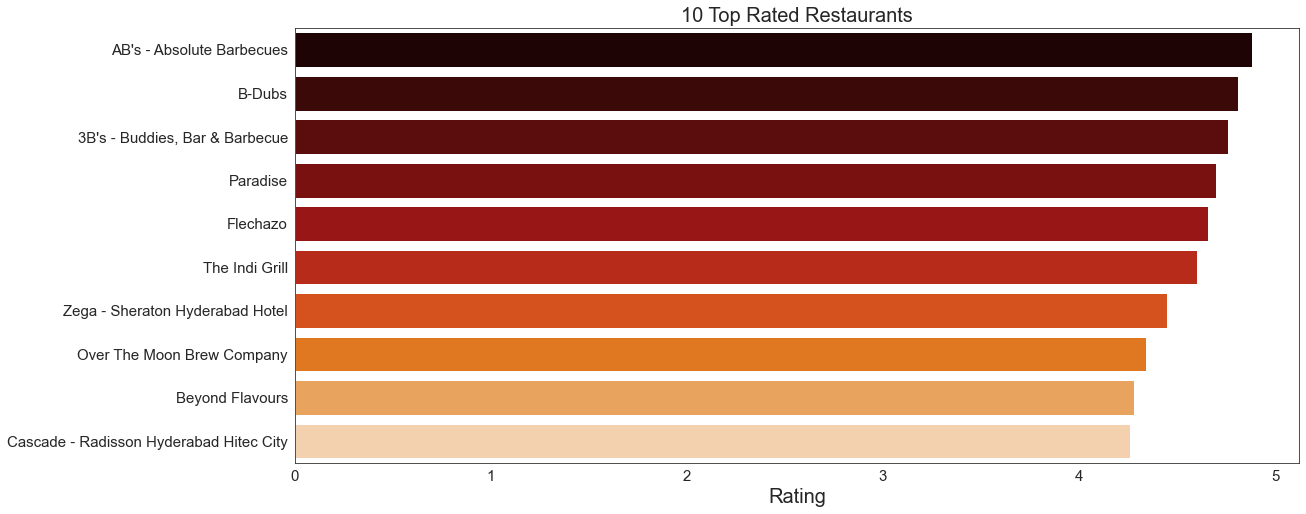

In [18]:
sns.set_style("white")
plt.figure(figsize = (18, 8))
sns.barplot(x = "Rating", y = "Restaurant", data = trr_10, palette = "gist_heat")
plt.title("10 Top Rated Restaurants", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Rating", size = 20)
plt.ylabel(None)
plt.savefig("10_Top_Rated_Restaurants.png")
plt.show()

**Top Reviewed Restaurants**

In [19]:
# Top 10 Reviewed Restaurants

trer = rest_review.groupby("Restaurant")["No_of_Reviews"].agg("sum").reset_index().sort_values(by = "No_of_Reviews", ascending = False)
trer_10 = trer[:10]
trer_10

,Restaurant,No_of_Reviews
55,Labonel,6628
68,Pista House,5429
20,Chinese Pavilion,5409
31,Dunkin' Donuts,5289
89,The Old Madras Baking Company,5115
22,Collage - Hyatt Hyderabad Gachibowli,4764
19,Cascade - Radisson Hyderabad Hitec City,4444
44,Hyderabadi Daawat,4412
33,Faasos,4392
30,Driven Cafe,4378


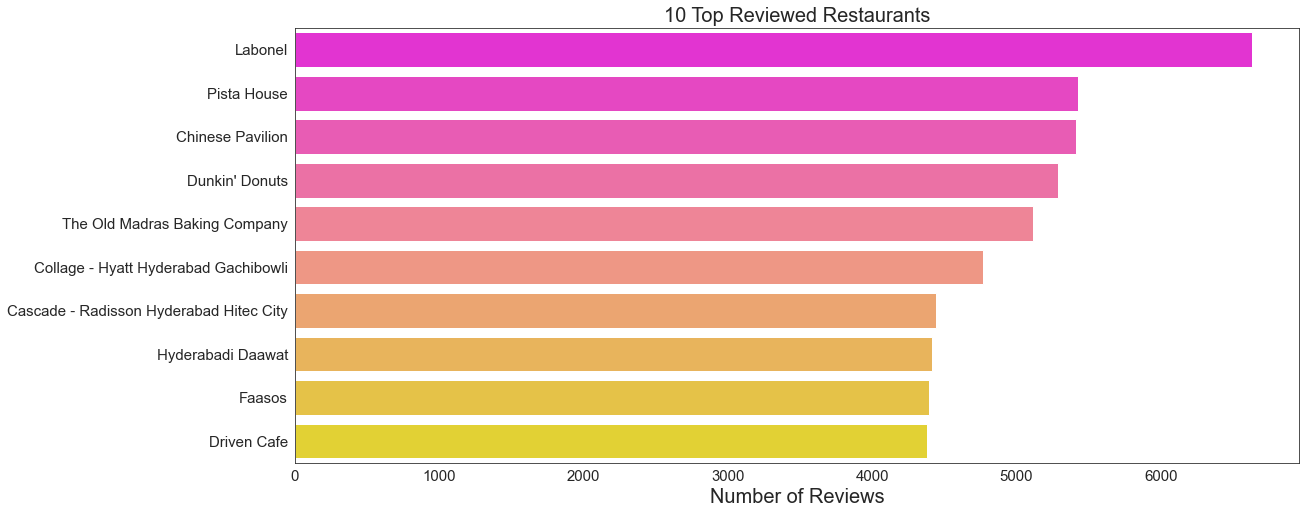

In [20]:
plt.figure(figsize = (18, 8))
sns.barplot(x = "No_of_Reviews", y = "Restaurant", data = trer_10, palette = "spring")
plt.title("10 Top Reviewed Restaurants", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Number of Reviews", size = 20)
plt.ylabel(None)
plt.savefig("10_Top_Reviewed_Restaurants.png")
plt.show()

**Top Followed Restaurants**

In [21]:
tfr = rest_review.groupby("Restaurant")["No_of_Followers"].agg("sum").reset_index().sort_values(by = "No_of_Followers", ascending = False)
tfr_10 = tfr[:10]
tfr_10

,Restaurant,No_of_Followers
68,Pista House,51068
52,Komatose - Holiday Inn Express & Suites,46229
44,Hyderabadi Daawat,45375
90,The Tilt Bar Republic,42126
31,Dunkin' Donuts,37667
20,Chinese Pavilion,35426
33,Faasos,34640
80,T Grill,32222
19,Cascade - Radisson Hyderabad Hitec City,31644
13,Barbeque Nation,30866


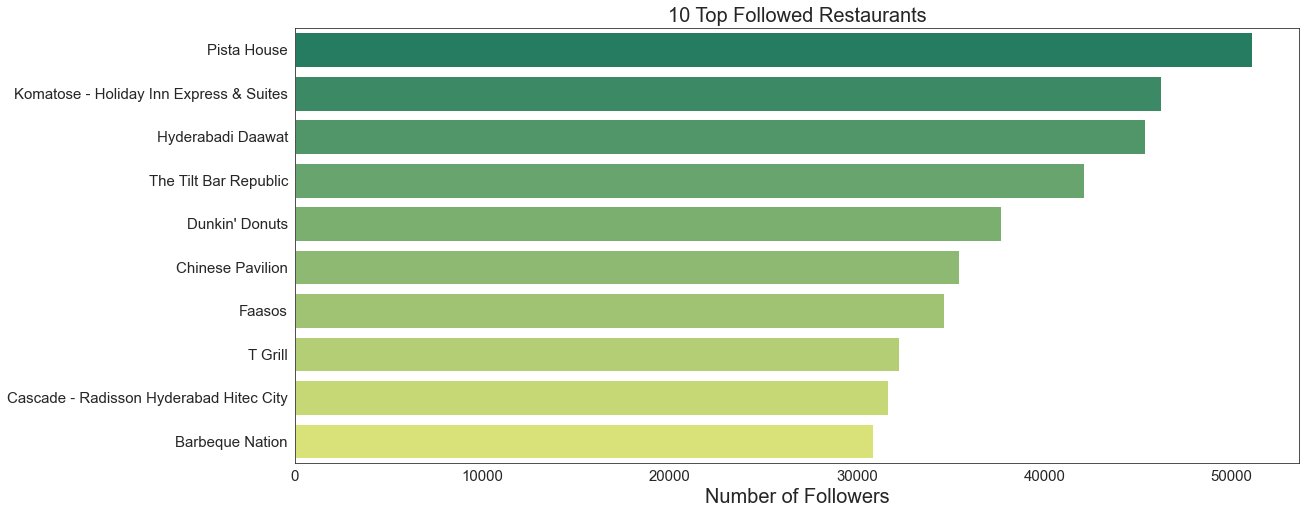

In [22]:
plt.figure(figsize = (18, 8))
sns.barplot(x = "No_of_Followers", y = "Restaurant", data = tfr_10, palette = "summer")
plt.title("10 Top Followed Restaurants", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Number of Followers", size = 20)
plt.ylabel(None)
plt.savefig("10_Top_Followed_Restaurants.png")
plt.show()

### Identify Top 20 word frequencies for Reviews

**Defining the set containing all the stopwords**

In [23]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

**Cleaning and removing the above stop words list from the text/body**

In [24]:
STOPWORDS = set(stopwordlist)

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

rest_review['Review'] = rest_review['Review'].apply(lambda text: cleaning_stopwords(text))
rest_review['Review'].head()

0    The ambience good, food quite good . Saturday ...
1    Ambience good pleasant evening. Service prompt...
2    A must try.. great food great ambience. Thnx s...
3    Soumen das Arun great guy. Only behavior since...
4    Food good.we ordered Kodi drumsticks basket mu...
Name: Review, dtype: object

**Cleaning and removing punctuations**

In [25]:
punctuations_list = string.punctuation

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

rest_review['Review'] = rest_review['Review'].apply(lambda x: cleaning_punctuations(x))
rest_review['Review'].tail()

9995    Madhumathi Mahajan Well start nice courteous s...
9996    This place never disappointed us The food cour...
9997    Bad rating mainly Chicken Bone found Veg food ...
9998    I personally love prefer Chinese Food Had coup...
9999    Checked try delicious chinese food here seen n...
Name: Review, dtype: object

**Cleaning and removing repeating characters**

In [26]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

rest_review['Review'] = rest_review['Review'].apply(lambda x: cleaning_repeating_char(x))
rest_review['Review'].tail()

9995    Madhumathi Mahajan Well start nice courteous s...
9996    This place never disappointed us The food cour...
9997    Bad rating mainly Chicken Bone found Veg food ...
9998    I personally love prefer Chinese Food Had coup...
9999    Checked try delicious chinese food here seen n...
Name: Review, dtype: object

**Cleaning and removing Numeric numbers**

In [27]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

rest_review['Review'] = rest_review['Review'].apply(lambda x: cleaning_numbers(x))
rest_review['Review'].tail()

9995    Madhumathi Mahajan Well start nice courteous s...
9996    This place never disappointed us The food cour...
9997    Bad rating mainly Chicken Bone found Veg food ...
9998    I personally love prefer Chinese Food Had coup...
9999    Checked try delicious chinese food here seen n...
Name: Review, dtype: object

**Top 20 Two word Frequencies of Reviews** 

In [28]:
text = ' '.join(rest_review["Review"])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [29]:
two_words_df = pd.DataFrame(two_words.items(), columns=['Reviews Words', 'Frequency'])
two_words_df = two_words_df.sort_values(by = "Frequency", ascending = False)
two_words_20 = two_words_df[:20]
two_words_20

,Reviews Words,Frequency
2874,I ordered,559
554,The food,471
294,We ordered,391
1433,main course,387
207,really good,376
72,I would,371
1063,This place,353
2069,not good,349
459,good but,318
75,visit place,315


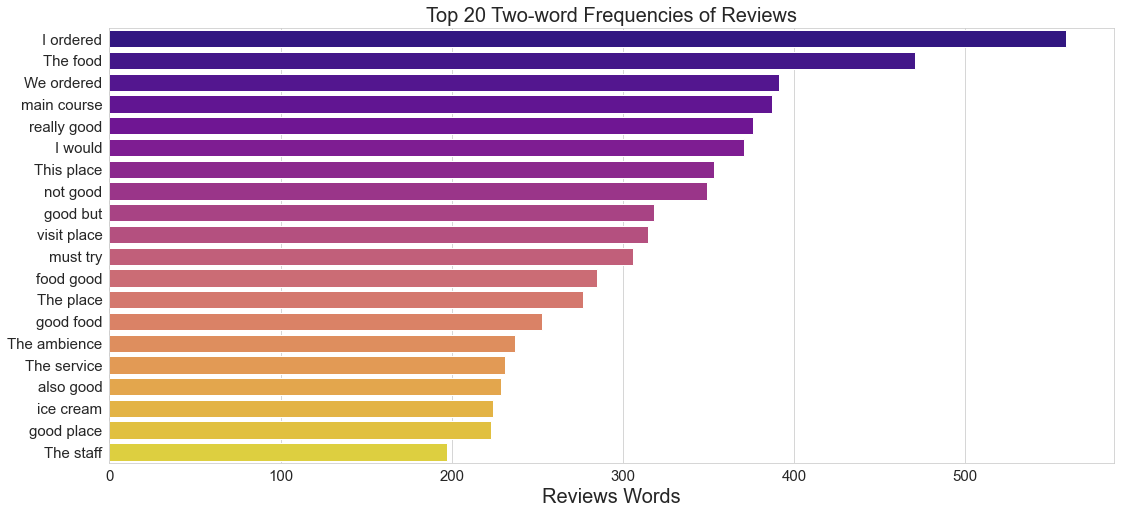

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize = (18, 8))
sns.barplot(y = "Reviews Words", x = "Frequency", data = two_words_20, palette = "plasma")
plt.title("Top 20 Two-word Frequencies of Reviews", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Reviews Words", size = 20)
plt.ylabel(None)
plt.savefig("Top_20_Two-word_Frequencies_of_Reviews.png")
plt.show()

### Identify Top 20 word frequencies for Cusines

**Cleaning and removing the above stop words from the text/body**

In [31]:
rest_name_info['Cuisines'] = rest_name_info['Cuisines'].apply(lambda text: cleaning_stopwords(text))
rest_name_info['Cuisines'].head()

0    Chinese, Continental, Kebab, European, South I...
1                       Biryani, North Indian, Chinese
2         Asian, Mediterranean, North Indian, Desserts
3    Biryani, North Indian, Chinese, Seafood, Bever...
4    Asian, Continental, North Indian, Chinese, Med...
Name: Cuisines, dtype: object

**Cleaning and Removing Punctuations**

In [32]:
rest_name_info['Cuisines'] = rest_name_info['Cuisines'].apply(lambda x: cleaning_punctuations(x))
rest_name_info['Cuisines'].head()

0    Chinese Continental Kebab European South India...
1                         Biryani North Indian Chinese
2            Asian Mediterranean North Indian Desserts
3       Biryani North Indian Chinese Seafood Beverages
4    Asian Continental North Indian Chinese Mediter...
Name: Cuisines, dtype: object

**Cleaning and removing repeating characters**

In [33]:
rest_name_info['Cuisines'] = rest_name_info['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
rest_name_info['Cuisines'].head()

0    Chinese Continental Kebab European South India...
1                         Biryani North Indian Chinese
2            Asian Mediterranean North Indian Desserts
3       Biryani North Indian Chinese Seafood Beverages
4    Asian Continental North Indian Chinese Mediter...
Name: Cuisines, dtype: object

**Cleaning and removing Numeric numbers**

In [34]:
rest_name_info['Cuisines'] = rest_name_info['Cuisines'].apply(lambda x: cleaning_numbers(x))
rest_name_info['Cuisines'].head()

0    Chinese Continental Kebab European South India...
1                         Biryani North Indian Chinese
2            Asian Mediterranean North Indian Desserts
3       Biryani North Indian Chinese Seafood Beverages
4    Asian Continental North Indian Chinese Mediter...
Name: Cuisines, dtype: object

**Top 20 Two word Frequencies of Cuisines**

In [35]:
text = ' '.join(rest_name_info['Cuisines'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [36]:
two_words_dfc = pd.DataFrame(two_words.items(), columns=['Cuisine Words', 'Frequency'])
two_words_dfc = two_words_dfc.sort_values(by = "Frequency", ascending = False)
two_words_20c = two_words_dfc[:20]
two_words_20c

,Cuisine Words,Frequency
6,North Indian,61
9,Indian Chinese,27
42,Fast Food,15
4,South Indian,9
5,Indian North,9
33,Chinese North,8
24,Indian Continental,6
65,Italian North,6
8,Biryani North,6
28,Food North,6


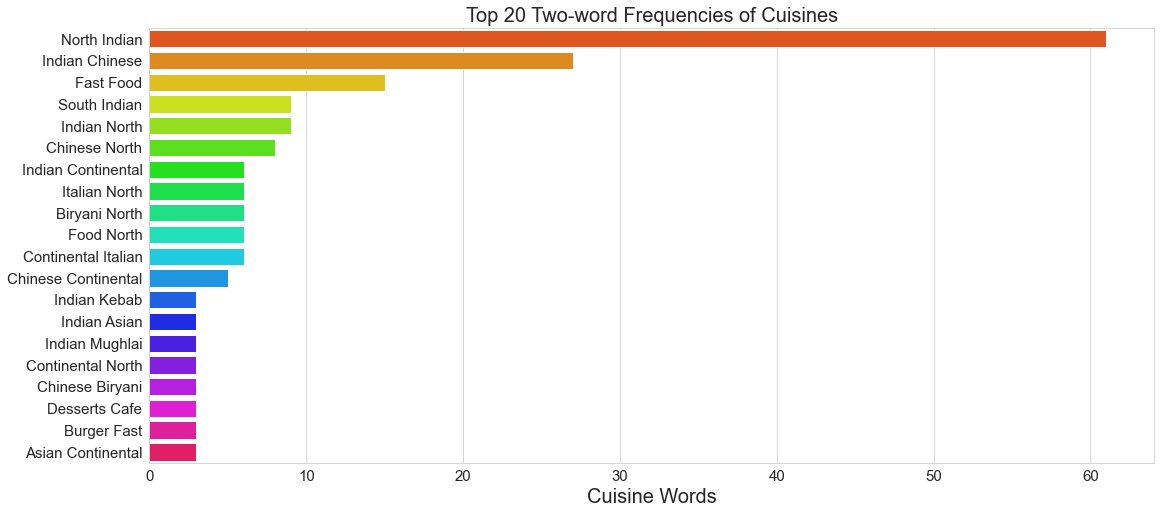

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize = (18, 8))
sns.barplot(y = "Cuisine Words", x = "Frequency", data = two_words_20c, palette = "hsv")
plt.title("Top 20 Two-word Frequencies of Cuisines", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Cuisine Words", size = 20)
plt.ylabel(None)
plt.savefig("Top_20_Two-word_Frequencies_of_Cuisines.png")
plt.show()

### Recommendor System

**Preparing Data**

In [38]:
# Import Restaurant Review Data

df1 = pd.read_csv("Restaurant_Review.csv")

In [39]:
# Import Restaurant Name and Related Info Data

df2 = pd.read_csv("Restaurant name and related info.csv")

In [40]:
# Examine Columns

df2[:3]

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"


In [41]:
# Split Cusines Column by Cuisine
df2["Cuisines"] = df2["Cuisines"].str.split(",")
df2[:3]

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","[Chinese, Continental, Kebab, European, So...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"[Biryani, North Indian, Chinese]",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"


**One Hot Encoding on Cuisines**

In [42]:
df_c = df2.copy()

# iterate in cuisine column
for index, row in df2.iterrows(): 
    for genre in row["Cuisines"]:
        df_c.at[index, genre] = 1
        
#Filling in the NaN values with 0 to show that a movie doesn't have that column's 
df_c = df_c.fillna(0)
df_c.head().T

,0,1,2,3,4
Name,Beyond Flavours,Paradise,Flechazo,Shah Ghouse Hotel & Restaurant,Over The Moon Brew Company
Links,https://www.zomato.com/hyderabad/beyond-flavou...,https://www.zomato.com/hyderabad/paradise-gach...,https://www.zomato.com/hyderabad/flechazo-gach...,https://www.zomato.com/hyderabad/shah-ghouse-h...,https://www.zomato.com/hyderabad/over-the-moon...
Cost,800,800,"1,300",800,"1,200"
Collections,"Food Hygiene Rated Restaurants in Hyderabad, C...",Hyderabad's Hottest,"Great Buffets, Hyderabad's Hottest",Late Night Restaurants,"Best Bars & Pubs, Food Hygiene Rated Restauran..."
Cuisines,"[Chinese, Continental, Kebab, European, So...","[Biryani, North Indian, Chinese]","[Asian, Mediterranean, North Indian, Desserts]","[Biryani, North Indian, Chinese, Seafood, ...","[Asian, Continental, North Indian, Chinese,..."
...,...,...,...,...,...
Cafe,0.0,0.0,0.0,0.0,0.0
Hyderabadi,0.0,0.0,0.0,0.0,0.0
Mithai,0.0,0.0,0.0,0.0,0.0
Thai,0.0,0.0,0.0,0.0,0.0


**Content Based Recommendor System**

In [43]:
userInput = [
            {'Restaurant':"Pakwaan Grand", 'Rating':5},
            {'Restaurant':"Club Rogue", 'Rating':3.5},
            {'Restaurant':"Flechazo", 'Rating':2},
            {'Restaurant':"Green Bawarchi Restaurant", 'Rating':5},
            {'Restaurant':"Dunkin' Donuts", 'Rating':4.5}
         ] 
inputRestaurant = pd.DataFrame(userInput)
inputRestaurant

,Restaurant,Rating
0,Pakwaan Grand,5.0
1,Club Rogue,3.5
2,Flechazo,2.0
3,Green Bawarchi Restaurant,5.0
4,Dunkin' Donuts,4.5


In [44]:
# Check Customer Input in Cuisine Data

input_res = df2[df2["Name"].isin(inputRestaurant["Restaurant"].to_list())]
input_res = input_res.rename(columns = {"Name": "Restaurant"})
input_res

,Restaurant,Links,Cost,Collections,Cuisines,Timings
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
19,Pakwaan Grand,https://www.zomato.com/hyderabad/pakwaan-grand...,400,Trending This Week,"[North Indian, Chinese, Biryani]",12 Noon to 11 PM
33,Club Rogue,https://www.zomato.com/hyderabad/club-rogue-ga...,900,NaN,"[North Indian, Fast Food]",11 AM to 12 Midnight
35,Green Bawarchi Restaurant,https://www.zomato.com/hyderabad/green-bawarch...,700,NaN,"[North Indian, Chinese, Biryani]",12 Noon to 11 PM
94,Dunkin' Donuts,https://www.zomato.com/hyderabad/dunkin-donuts...,550,NaN,"[Desserts, Cafe, Beverages, Burger, Fast F...",10 AM to 11 PM


In [45]:
# Set Customer Input Restasurant as Index

inputRestaurant = inputRestaurant.set_index("Restaurant")

In [46]:
# Set Restaurant as Index

input_res = input_res.set_index("Restaurant")

In [47]:
# Merge Data on Restaurants

inputRestaurant = pd.merge(inputRestaurant, input_res, left_index = True, right_index = True)
inputRestaurant

,Rating,Links,Cost,Collections,Cuisines,Timings
Restaurant,,,,,,
Pakwaan Grand,5.0,https://www.zomato.com/hyderabad/pakwaan-grand...,400,Trending This Week,"[North Indian, Chinese, Biryani]",12 Noon to 11 PM
Club Rogue,3.5,https://www.zomato.com/hyderabad/club-rogue-ga...,900,NaN,"[North Indian, Fast Food]",11 AM to 12 Midnight
Flechazo,2.0,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
Green Bawarchi Restaurant,5.0,https://www.zomato.com/hyderabad/green-bawarch...,700,NaN,"[North Indian, Chinese, Biryani]",12 Noon to 11 PM
Dunkin' Donuts,4.5,https://www.zomato.com/hyderabad/dunkin-donuts...,550,NaN,"[Desserts, Cafe, Beverages, Burger, Fast F...",10 AM to 11 PM


In [48]:
# Show Necessary Columns
inputRestaurant = inputRestaurant.reset_index()
inputRestaurant = inputRestaurant[["Restaurant", "Cuisines", "Rating"]] 
inputRestaurant

,Restaurant,Cuisines,Rating
0,Pakwaan Grand,"[North Indian, Chinese, Biryani]",5.0
1,Club Rogue,"[North Indian, Fast Food]",3.5
2,Flechazo,"[Asian, Mediterranean, North Indian, Desserts]",2.0
3,Green Bawarchi Restaurant,"[North Indian, Chinese, Biryani]",5.0
4,Dunkin' Donuts,"[Desserts, Cafe, Beverages, Burger, Fast F...",4.5


In [49]:
# Check Restaurants
user_Restaurants = df_c[df_c["Name"].isin(inputRestaurant["Restaurant"].to_list())]
user_Restaurants

,Name,Links,Cost,Collections,Cuisines,Timings,Chinese,Continental,Kebab,European,...,Burger,Momos,Pizza,Arabian,North Eastern,Cafe,Hyderabadi,Mithai,Thai,Malaysian
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Pakwaan Grand,https://www.zomato.com/hyderabad/pakwaan-grand...,400,Trending This Week,"[North Indian, Chinese, Biryani]",12 Noon to 11 PM,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,Club Rogue,https://www.zomato.com/hyderabad/club-rogue-ga...,900,0,"[North Indian, Fast Food]",11 AM to 12 Midnight,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,Green Bawarchi Restaurant,https://www.zomato.com/hyderabad/green-bawarch...,700,0,"[North Indian, Chinese, Biryani]",12 Noon to 11 PM,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,Dunkin' Donuts,https://www.zomato.com/hyderabad/dunkin-donuts...,550,0,"[Desserts, Cafe, Beverages, Burger, Fast F...",10 AM to 11 PM,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
# Cuisine Table

user_Restaurants = user_Restaurants.reset_index(drop = True)
user_Restaurants  = user_Restaurants.drop(columns = ["Name", "Links", "Cost", "Collections", "Cuisines", "Timings"]) 
user_Restaurants

,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,Chinese,Asian,Mediterranean,...,Burger,Momos,Pizza,Arabian,North Eastern,Cafe,Hyderabadi,Mithai,Thai,Malaysian
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [51]:
# Add weights to Cuisine
userProfile = user_Restaurants.transpose().dot(inputRestaurant["Rating"])
userProfile

Chinese          0.0
 Continental     0.0
 Kebab           0.0
 European        0.0
 South Indian    0.0
                ... 
 Cafe            4.5
Hyderabadi       0.0
 Mithai          0.0
Thai             0.0
 Malaysian       0.0
Length: 70, dtype: float64

In [52]:
# Cuisine Table by Restaurants

CuisineTable = df_c.set_index(df_c["Name"])
CuisineTable = CuisineTable.drop(columns = ["Name", "Links", "Cost", "Collections"])
CuisineTable

,Cuisines,Timings,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,Chinese,...,Burger,Momos,Pizza,Arabian,North Eastern,Cafe,Hyderabadi,Mithai,Thai,Malaysian
Name,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,"[Chinese, Continental, Kebab, European, So...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Paradise,"[Biryani, North Indian, Chinese]",11 AM to 11 PM,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Flechazo,"[Asian, Mediterranean, North Indian, Desserts]","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Shah Ghouse Hotel & Restaurant,"[Biryani, North Indian, Chinese, Seafood, ...",12 Noon to 2 AM,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Over The Moon Brew Company,"[Asian, Continental, North Indian, Chinese,...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IndiBlaze,"[Fast Food, Salad]",11 AM to 11 PM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sweet Basket,"[Bakery, Mithai]","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Angaara Counts 3,"[North Indian, Biryani, Chinese]",12 Noon to 11 PM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Multiply the genres by the weights and then take the weighted average

recommendationTable_df = ((CuisineTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

Name
Beyond Flavours                   0.069444
Paradise                          0.187500
Flechazo                          0.277778
Shah Ghouse Hotel & Restaurant    0.250000
Over The Moon Brew Company        0.326389
dtype: float64

In [54]:
#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)

#Just a peek at the values
recommendationTable_df.head()

Name
Biryanis And More            0.381944
Pakwaan Grand                0.381944
Aromas@11SIX                 0.381944
Green Bawarchi Restaurant    0.381944
Olive Garden                 0.381944
dtype: float64

**The final recommendation Table**

In [55]:
recommendations = df2.loc[df2['Name'].isin(recommendationTable_df.head(20).keys())]
recommendations = recommendations[["Name", "Cuisines", "Cost"]]
recommendations.columns = ["Restaurant", "Cuisines", "Cost"]
recommendations[:20]

,Restaurant,Cuisines,Cost
2,Flechazo,"[Asian, Mediterranean, North Indian, Desserts]","1,300"
4,Over The Moon Brew Company,"[Asian, Continental, North Indian, Chinese,...","1,200"
18,10 Downing Street,"[North Indian, Chinese, Continental]","1,900"
19,Pakwaan Grand,"[North Indian, Chinese, Biryani]",400
24,SKYHY,"[North Indian, Chinese, Continental]","1,400"
35,Green Bawarchi Restaurant,"[North Indian, Chinese, Biryani]",700
52,Biryanis And More,"[North Indian, Biryani, Chinese]",500
57,Being Hungry,"[North Indian, Chinese]",450
60,PourHouse7,"[North Indian, Continental, Chinese, Italian]","1,200"
62,Shree Santosh Dhaba Family Restaurant,"[North Indian, Chinese, Fast Food]",500
